# _**Compare water content and leakage simulation 2802-01**_


_Authors: Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon_


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from GEOSPACE_Output import*
from timeseries_writer import *

####### Plot settings #######
nice_fonts = {
    "legend.frameon": True, 
    "legend.fancybox": True, 
    "legend.facecolor": "white", 
    "axes.edgecolor": "0.8",
    "axes.linewidth": 0.6,
    "grid.linewidth":0.3,
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 16,
    "font.size": 16,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(project_path+'/output/SpikeII')
#os.listdir()

In [3]:
lab='2802_01'

In [4]:
file_name = 'Java_SpikeIISpikeADE_'+lab+'_0000.nc'

In [5]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:                                (depth: 91, dualDepth: 91, time: 1272)
Coordinates:
  * depth                                  (depth) float64 -2.237 -2.212 ... 0.0
  * dualDepth                              (dualDepth) float64 -2.25 ... 0.0
  * time                                   (time) datetime64[ns] 2018-05-10T0...
Data variables: (12/20)
    psiIC                                  (depth) float64 ...
    psi                                    (time, depth) float64 ...
    rootIC                                 (depth) float64 ...
    theta                                  (time, depth) float64 ...
    waterVolume                            (time, depth) float64 ...
    darcyVelocity                          (time, dualDepth) float64 ...
    ...                                     ...
    timeVariationsWConcentration           (time, depth) float64 ...
    dispersionSoluteFluxes                 (time, dualDepth) float64 ...
    advectionSoluteFluxes                  (time, dualDepth) float64 ...
    errorWaterVolumeConcentration          (time) float64 ...
    errorVolume                            (time) float64 ...
    controlVolume                          (depth) float64 ...
Attributes: (12/15)
    Description_of_the_problem:                            \nInitial conditio...
    Top_boundary_condition_for_solute_equation:            
    Bottom_boundary_condition_for_solute_equation:         
    Top_boundary_condition_for_Richards_equation:          
    Bottom_boundary_condition_for_Richards_equation:       
    path_top_boundary_condition_for_solute_equation:       
    ...                                                    ...
    path_grid:                                             data/Grid_NetCDF/G...
    time_delta:                                             
    swrc_model:                                            VG
    soil_hydraulic_conductivity_model:                     Mualem VG no tempe...
    interface_hydraulic_conductivity_model:                max
    interface_dispersion_coefficient_model:

In [6]:
ds.depth.values

array([-2.2375, -2.2125, -2.1875, -2.1625, -2.1375, -2.1125, -2.0875,
       -2.0625, -2.0375, -2.0125, -1.9875, -1.9625, -1.9375, -1.9125,
       -1.8875, -1.8625, -1.8375, -1.8125, -1.7875, -1.7625, -1.7375,
       -1.7125, -1.6875, -1.6625, -1.6375, -1.6125, -1.5875, -1.5625,
       -1.5375, -1.5125, -1.4875, -1.4625, -1.4375, -1.4125, -1.3875,
       -1.3625, -1.3375, -1.3125, -1.2875, -1.2625, -1.2375, -1.2125,
       -1.1875, -1.1625, -1.1375, -1.1125, -1.0875, -1.0625, -1.0375,
       -1.0125, -0.9875, -0.9625, -0.9375, -0.9125, -0.8875, -0.8625,
       -0.8375, -0.8125, -0.7875, -0.7625, -0.7375, -0.7125, -0.6875,
       -0.6625, -0.6375, -0.6125, -0.5875, -0.5625, -0.5375, -0.5125,
       -0.4875, -0.4625, -0.4375, -0.4125, -0.3875, -0.3625, -0.3375,
       -0.3125, -0.2875, -0.2625, -0.2375, -0.2125, -0.1875, -0.1625,
       -0.1375, -0.1125, -0.0875, -0.0625, -0.0375, -0.0125,  0.    ])

## Estraggo manualmente i volumi di controllo nell'intorno di -0.25

In [7]:
os.chdir(project_path+'/data/SpikeII')
#os.listdir()

In [8]:
a=ds.depth.values[81]
a

-0.2124999999999999

In [9]:
a25=ds.theta.sel(depth= a, time=ds.time.values[:]).values
a25

array([0.18367238, 0.18367763, 0.18368307, ..., 0.15994077, 0.15979141,
       0.15965373])

In [10]:
b=ds.depth.values[80]
b

-0.23750000000000004

In [11]:
b25=ds.theta.sel(depth=b, time=ds.time.values[:]).values
b25

array([0.18455514, 0.18456077, 0.18456653, ..., 0.15979505, 0.15964442,
       0.15950595])

In [12]:
c=ds.depth.values[79]
c

-0.26249999999999996

In [13]:
c25=ds.theta.sel(depth=c, time=ds.time.values[:]).values
c25

array([0.18546262, 0.18546872, 0.18547486, ..., 0.1596399 , 0.15948796,
       0.15934867])

In [14]:
d=ds.depth.values[78]
d

-0.28749999999999987

In [15]:
d25=ds.theta.sel(depth=d, time=ds.time.values[:]).values
d25

array([0.18639604, 0.18640266, 0.18640924, ..., 0.15948367, 0.15933044,
       0.15919036])

<br>

In [16]:
COLUMN_NAMES=['Datetime','vwcA25', 'vwcB25', 'vwcC25', 'vwcD25']
df_hourly25 = pd.DataFrame(columns=COLUMN_NAMES)
df_hourly25

Empty DataFrame
Columns: [Datetime, vwcA25, vwcB25, vwcC25, vwcD25]
Index: []

In [17]:
date_rng = pd.date_range(start='05/10/2018 00:00', end='07/01/2018 23:00' , freq='1H')

In [18]:
df_hourly25['Datetime']=date_rng
df_hourly25['vwcA25']=a25
df_hourly25['vwcB25']=b25
df_hourly25['vwcC25']=c25
df_hourly25['vwcD25']=d25


In [19]:
df_hourly25 = df_hourly25.assign(vwc25mean=df_hourly25[['vwcA25', 'vwcB25', 'vwcC25', 'vwcD25']].mean(axis=1))


In [20]:
mean25=df_hourly25['vwc25mean'].mean()
mean25

0.204435191517353

In [21]:
std25=df_hourly25['vwc25mean'].std()
std25

0.028936274823860925

In [22]:
df_hourly25=df_hourly25.assign(vwc25norm=(df_hourly25['vwc25mean']-mean25)/std25)


In [23]:
df_hourly25.reset_index(inplace=True)
df_hourly25.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly25,'vwc_hourly_normlized25_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_normlized25_2802_01.csv


## Estraggo manualmente i volumi di controllo nell'intorno di -0.75

In [24]:
a=ds.depth.values[61]
a

-0.7124999999999999

In [25]:
a75=ds.theta.sel(depth= a, time=ds.time.values[:]).values
a75

array([0.20697099, 0.20609309, 0.20537936, ..., 0.16497699, 0.16481637,
       0.16466902])

In [26]:
b=ds.depth.values[60]

In [27]:
b75=ds.theta.sel(depth=b, time=ds.time.values[:]).values
b75

array([0.20794244, 0.20685656, 0.20606047, ..., 0.16569125, 0.16552949,
       0.16538079])

In [28]:
c=ds.depth.values[59]

In [29]:
c75=ds.theta.sel(depth=c, time=ds.time.values[:]).values
c75

array([0.20839118, 0.20730989, 0.20651573, ..., 0.16639031, 0.16622797,
       0.16607847])

In [30]:
d=ds.depth.values[58]
d

-0.7874999999999999

In [31]:
d75=ds.theta.sel(depth=d, time=ds.time.values[:]).values
d75

array([0.20828515, 0.20743378, 0.20673213, ..., 0.16707051, 0.16690814,
       0.16675834])

In [32]:
COLUMN_NAMES=['Datetime','vwcA75', 'vwcB75', 'vwcC75', 'vwcD75']
df_hourly75 = pd.DataFrame(columns=COLUMN_NAMES)
df_hourly75

Empty DataFrame
Columns: [Datetime, vwcA75, vwcB75, vwcC75, vwcD75]
Index: []

In [33]:
df_hourly75['Datetime']=date_rng
df_hourly75['vwcA75']=a75
df_hourly75['vwcB75']=b75
df_hourly75['vwcC75']=c75
df_hourly75['vwcD75']=d75


In [34]:
df_hourly75 = df_hourly75.assign(vwc75mean=df_hourly75[['vwcA75', 'vwcB75', 'vwcC75', 'vwcD75']].mean(axis=1))


In [35]:
mean75=df_hourly75['vwc75mean'].mean()
mean75

0.20078741875069486

In [36]:
std75=df_hourly75['vwc75mean'].std()
std75

0.02733840763096364

In [37]:
df_hourly75=df_hourly75.assign(vwc75norm=(df_hourly75['vwc75mean']-mean75)/std75)


In [38]:
#df_hourly75.reset_index(inplace=True)
df_hourly75.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly75,'vwc_hourly_normlized75_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_normlized75_2802_01.csv


## Estraggo manualmente i volumi di controllo nell'intorno di -1.25

In [39]:
a=ds.depth.values[41]
a

-1.2125

In [40]:
a125=ds.theta.sel(depth= a, time=ds.time.values[:]).values
a125

array([0.19615323, 0.19634059, 0.19653055, ..., 0.17559481, 0.17543016,
       0.17527753])

In [41]:
b=ds.depth.values[40]

In [42]:
b125=ds.theta.sel(depth=b, time=ds.time.values[:]).values
b125

array([0.19550635, 0.19568687, 0.19586788, ..., 0.17592959, 0.17576489,
       0.17561229])

In [43]:
c=ds.depth.values[39]

In [44]:
c125=ds.theta.sel(depth=c, time=ds.time.values[:]).values
c125

array([0.19488488, 0.19505446, 0.19522488, ..., 0.17625141, 0.17608673,
       0.17593424])

In [45]:
d=ds.depth.values[38]

In [46]:
d125=ds.theta.sel(depth=d, time=ds.time.values[:]).values
d125

array([0.19428853, 0.19444321, 0.19460154, ..., 0.17656136, 0.1763968 ,
       0.1762445 ])

<br>

In [47]:
COLUMN_NAMES=['Datetime','vwcA125', 'vwcB125', 'vwcC125', 'vwcD125']
df_hourly125 = pd.DataFrame(columns=COLUMN_NAMES)
df_hourly125

Empty DataFrame
Columns: [Datetime, vwcA125, vwcB125, vwcC125, vwcD125]
Index: []

In [48]:
df_hourly125['Datetime']=date_rng
df_hourly125['vwcA125']=a125
df_hourly125['vwcB125']=b125
df_hourly125['vwcC125']=c125
df_hourly125['vwcD125']=d125


In [49]:
df_hourly125 = df_hourly125.assign(vwc125mean=df_hourly125[['vwcA125', 'vwcB125', 'vwcC125', 'vwcD125']].mean(axis=1))


In [50]:
mean125=df_hourly125['vwc125mean'].mean()
mean125

0.19700691310134427

In [51]:
std125=df_hourly125['vwc125mean'].std()
std125

0.025613606495254664

In [52]:
df_hourly125=df_hourly125.assign(vwc125norm=(df_hourly125['vwc125mean']-mean125)/std125)


In [53]:
#df_hourly75.reset_index(inplace=True)
df_hourly125.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly125,'vwc_hourly_normlized125_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_normlized125_2802_01.csv


## Estraggo manualmente i volumi di controllo nell'intorno di -1.75

In [54]:
a=ds.depth.values[21]
a

-1.7125

In [55]:
a175=ds.theta.sel(depth= a, time=ds.time.values[:]).values
a175

array([0.18571299, 0.18577205, 0.18583186, ..., 0.18160184, 0.18145128,
       0.18131508])

In [56]:
b=ds.depth.values[20]

In [57]:
b175=ds.theta.sel(depth=b, time=ds.time.values[:]).values
b175

array([0.18527272, 0.18532938, 0.18538672, ..., 0.18200226, 0.18185488,
       0.18172189])

In [58]:
c=ds.depth.values[19]

In [59]:
c175=ds.theta.sel(depth=c, time=ds.time.values[:]).values
c175

array([0.18483836, 0.18489275, 0.18494776, ..., 0.18243375, 0.18229006,
       0.1821607 ])

In [60]:
d=ds.depth.values[18]

In [61]:
d175=ds.theta.sel(depth=d, time=ds.time.values[:]).values
d175

array([0.18440979, 0.18446201, 0.18451482, ..., 0.18290017, 0.1827607 ,
       0.1826353 ])

<br>

In [62]:
COLUMN_NAMES=['Datetime','vwcA175', 'vwcB175', 'vwcC175', 'vwcD175']
df_hourly175 = pd.DataFrame(columns=COLUMN_NAMES)
df_hourly175

Empty DataFrame
Columns: [Datetime, vwcA175, vwcB175, vwcC175, vwcD175]
Index: []

In [63]:
df_hourly175['Datetime']=date_rng
df_hourly175['vwcA175']=a175
df_hourly175['vwcB175']=b175
df_hourly175['vwcC175']=c175
df_hourly175['vwcD175']=d175


In [64]:
df_hourly175 = df_hourly175.assign(vwc175mean=df_hourly175[['vwcA175', 'vwcB175', 'vwcC175', 'vwcD175']].mean(axis=1))


In [65]:
mean175=df_hourly175['vwc175mean'].mean()
mean175

0.18937483485745185

In [66]:
std175=df_hourly175['vwc175mean'].std()
std175

0.022683666597094095

In [67]:
df_hourly175=df_hourly175.assign(vwc175norm=(df_hourly175['vwc175mean']-mean175)/std175)


In [68]:
#df_hourly75.reset_index(inplace=True)
df_hourly175.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly175,'vwc_hourly_normlized175_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_normlized175_2802_01.csv


# Create a single dataset

In [69]:
COLUMN_NAMES=['Datetime','vwc25mean', 'vwc75mean', 'vwc125mean', 'vwc175mean']
df_hourly = pd.DataFrame(columns=COLUMN_NAMES)

In [70]:
df_hourly['Datetime']=date_rng
df_hourly['vwc25mean']=df_hourly25['vwc25mean']
df_hourly['vwc75mean']=df_hourly75['vwc75mean']
df_hourly['vwc125mean']=df_hourly125['vwc125mean']
df_hourly['vwc175mean']=df_hourly175['vwc175mean']
df_hourly

Datetime  vwc25mean  vwc75mean  vwc125mean  vwc175mean
0    2018-05-10 00:00:00   0.185022   0.207897    0.195208    0.185058
1    2018-05-10 01:00:00   0.185027   0.206923    0.195381    0.185114
2    2018-05-10 02:00:00   0.185033   0.206172    0.195556    0.185170
3    2018-05-10 03:00:00   0.185039   0.205551    0.195733    0.185227
4    2018-05-10 04:00:00   0.185045   0.205016    0.195911    0.185285
...                  ...        ...        ...         ...         ...
1267 2018-07-01 19:00:00   0.160029   0.166376    0.176432    0.182548
1268 2018-07-01 20:00:00   0.159894   0.166223    0.176276    0.182412
1269 2018-07-01 21:00:00   0.159715   0.166032    0.176084    0.182235
1270 2018-07-01 22:00:00   0.159564   0.165870    0.175920    0.182089
1271 2018-07-01 23:00:00   0.159425   0.165722    0.175767    0.181958

[1272 rows x 5 columns]

In [71]:
df_hourly.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly,'vwc_hourly_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_2802_01.csv


# Create a single dataset Normalized

In [72]:
COLUMN_NAMES=['Datetime','vwc25_norm', 'vwc75_norm', 'vwc125_norm', 'vwc175_norm']
df_hourly_normalized = pd.DataFrame(columns=COLUMN_NAMES)

In [73]:
df_hourly_normalized['Datetime']=date_rng
df_hourly_normalized['vwc25_norm']=df_hourly25['vwc25norm']
df_hourly_normalized['vwc75_norm']=df_hourly75['vwc75norm']
df_hourly_normalized['vwc125_norm']=df_hourly125['vwc125norm']
df_hourly_normalized['vwc175_norm']=df_hourly175['vwc175norm']


In [74]:
df_hourly_normalized.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly_normalized,'vwc_hourly_Normalized_'+lab+'.csv',ID_basin)



***SUCCESS writing!  vwc_hourly_Normalized_2802_01.csv


# Create leakage dataset

In [77]:
leakage=ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).values
leakage

array([-5.00195747e-09, -5.06552882e-09, -5.11863215e-09, ...,
       -1.44320691e-08, -1.42517429e-08, -1.40735843e-08])

In [78]:
os.chdir(project_path+'/data/SpikeII')
#os.listdir()

In [79]:
COLUMN_NAMES=['Datetime','Leakage_m/s']
df_hourly = pd.DataFrame(columns=COLUMN_NAMES)
df_hourly

Empty DataFrame
Columns: [Datetime, Leakage_m/s]
Index: []

In [80]:
date_rng = pd.date_range(start='05/10/2018 00:00', end='07/01/2018 23:00' , freq='1H')


In [81]:
df_hourly['Datetime']=date_rng
df_hourly['Leakage_m/s']=leakage


In [82]:
df_hourly= df_hourly.assign(Leakage_mm_h=df_hourly[['Leakage_m/s']]*-3600000)


In [83]:
#df_hourly.reset_index(inplace=True)
df_hourly.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly,'Leakage_mm_h_'+lab+'.csv',ID_basin)



***SUCCESS writing!  Leakage_mm_h_2802_01.csv


# Create a single dataset

In [84]:
COLUMN_NAMES=['Datetime','Leakage_mm_h']
df_hourly2 = pd.DataFrame(columns=COLUMN_NAMES)

In [85]:
df_hourly2['Datetime']=date_rng
df_hourly2['Leakage_mm_h']=df_hourly['Leakage_mm_h']


In [86]:
df_hourly2.insert(loc=0, column='-', value=np.nan)
ID_basin = 1
write_timeseries_csv(df_hourly2,'Leakage_mm_h_'+lab+'.csv',ID_basin)



***SUCCESS writing!  Leakage_mm_h_2802_01.csv


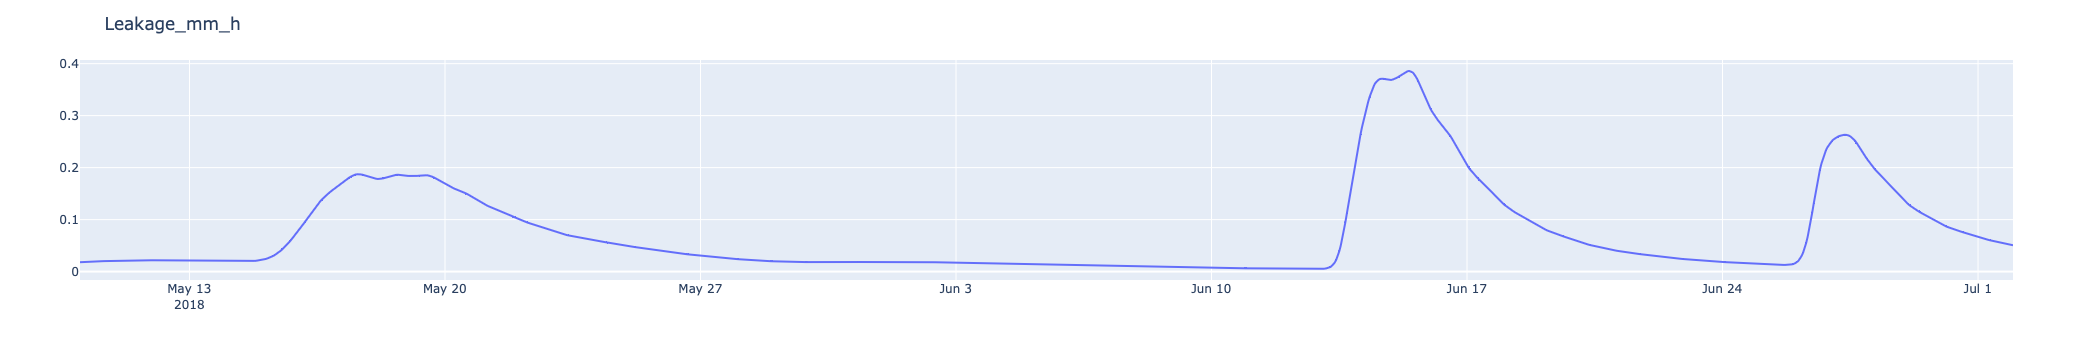

In [87]:
fig = px.line()
fig.add_trace(go.Scatter(x=df_hourly2['Datetime'], y=df_hourly2['Leakage_mm_h'], mode='lines', name='Leakage_mm_h'))

fig.update_layout(title= 'Leakage_mm_h')
fig.show()

In [88]:
df = pd.read_csv('vwc_hourly_Normalized_'+lab+'.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','vwc25_norm', 'vwc75_norm', 'vwc125_norm', 'vwc175_norm']
#df.set_index('Datetime',inplace=True)
df

Datetime  vwc25_norm  vwc75_norm  vwc125_norm  vwc175_norm
0    2018-05-10 00:00:00   -0.670910    0.260074    -0.070223    -0.190285
1    2018-05-10 01:00:00   -0.670706    0.224443    -0.063467    -0.187835
2    2018-05-10 02:00:00   -0.670500    0.196958    -0.056638    -0.185356
3    2018-05-10 03:00:00   -0.670292    0.174236    -0.049729    -0.182846
4    2018-05-10 04:00:00   -0.670088    0.154681    -0.042774    -0.180304
...                  ...         ...         ...          ...          ...
1267 2018-07-01 19:00:00   -1.534616   -1.258733    -0.803281    -0.300978
1268 2018-07-01 20:00:00   -1.539288   -1.264315    -0.809357    -0.306943
1269 2018-07-01 21:00:00   -1.545477   -1.271294    -0.816856    -0.314778
1270 2018-07-01 22:00:00   -1.550705   -1.277211    -0.823284    -0.321183
1271 2018-07-01 23:00:00   -1.555505   -1.282656    -0.829238    -0.326957

[1272 rows x 5 columns]

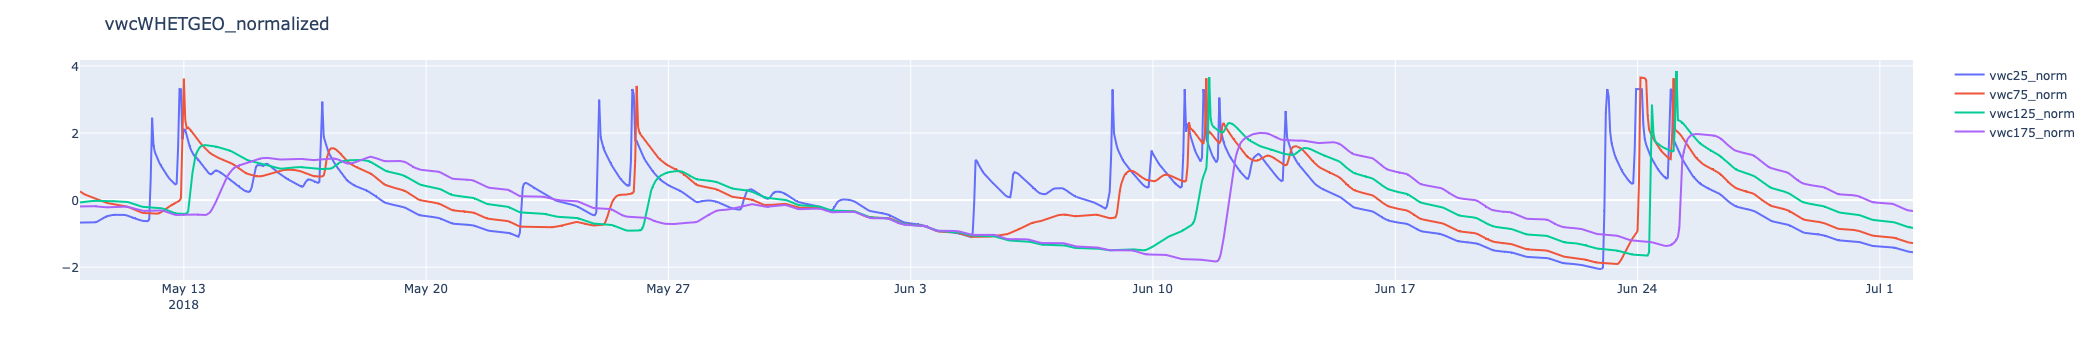

In [89]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25_norm'], mode='lines', name='vwc25_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75_norm'], mode='lines', name='vwc75_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125_norm'], mode='lines', name='vwc125_norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175_norm'], mode='lines', name='vwc175_norm'))
fig.update_layout(title= 'vwcWHETGEO_normalized')
fig.show()

In [90]:
df2 = pd.read_csv('vwcSpikeII_hourly_Normalized.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','vwcA25norm', 'vwcB25norm', 'vwcA75norm', 'vwcC75norm', 'vwcA125norm', 'vwcB125norm', 'vwcB175norm', 'vwcC175norm']
#df2.set_index('Datetime',inplace=True)
df2

Datetime  vwcA25norm  vwcB25norm  vwcA75norm  vwcC75norm  \
0    2018-05-10 00:00:00    0.680924    0.538536    1.041707    0.773869   
1    2018-05-10 01:00:00    0.680924    0.538536    1.041707    0.773869   
2    2018-05-10 02:00:00    0.680924    0.538536    1.041707    0.773869   
3    2018-05-10 03:00:00    0.680924    0.538536    1.041707    0.773869   
4    2018-05-10 04:00:00    0.680924    0.538536    1.041707    0.773869   
...                  ...         ...         ...         ...         ...   
1267 2018-07-01 19:00:00   -0.804410   -0.822126   -0.332293   -0.725158   
1268 2018-07-01 20:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1269 2018-07-01 21:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1270 2018-07-01 22:00:00   -0.804410   -0.670941   -0.332293   -0.725158   
1271 2018-07-01 23:00:00   -0.804410   -0.670941   -0.332293   -0.725158   

      vwcA125norm  vwcB125norm  vwcB175norm  vwcC175norm  
0        0.056345     1.194097     0.183571    -1.603084  
1        0.056345     1.194097     0.183571    -1.603084  
2        0.056345     1.015802     0.183571    -1.603084  
3        0.056345     0.480919     0.183571    -1.603084  
4        0.056345     0.480919     0.183571    -1.603084  
...           ...          ...          ...          ...  
1267     0.056345    -0.232259     0.183571     0.189566  
1268     0.056345    -0.232259     0.183571     0.189566  
1269     0.056345    -0.232259     0.183571     0.189566  
1270     0.056345    -0.232259     0.183571     0.189566  
1271     0.056345    -0.232259     0.183571     0.189566  

[1272 rows x 9 columns]

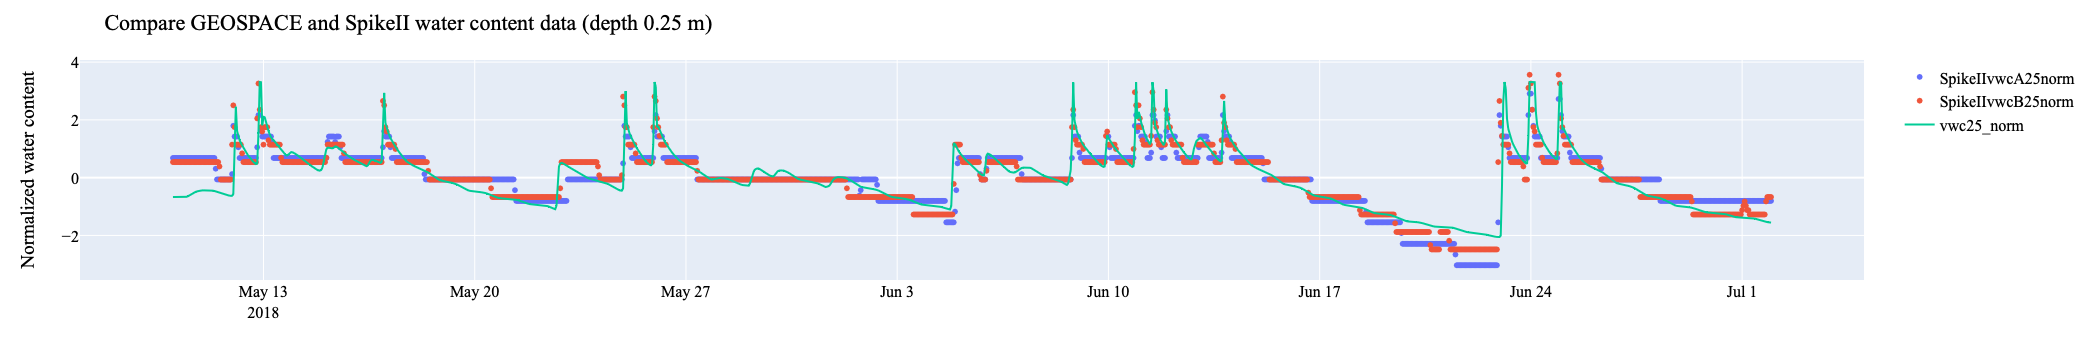

In [91]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA25norm'], mode='markers', name='SpikeIIvwcA25norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB25norm'], mode='markers', name='SpikeIIvwcB25norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25_norm'], mode='lines', name='vwc25_norm'))
fig.update_layout(
        title='Compare GEOSPACE and SpikeII water content data (depth 0.25 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=16))
fig.show()

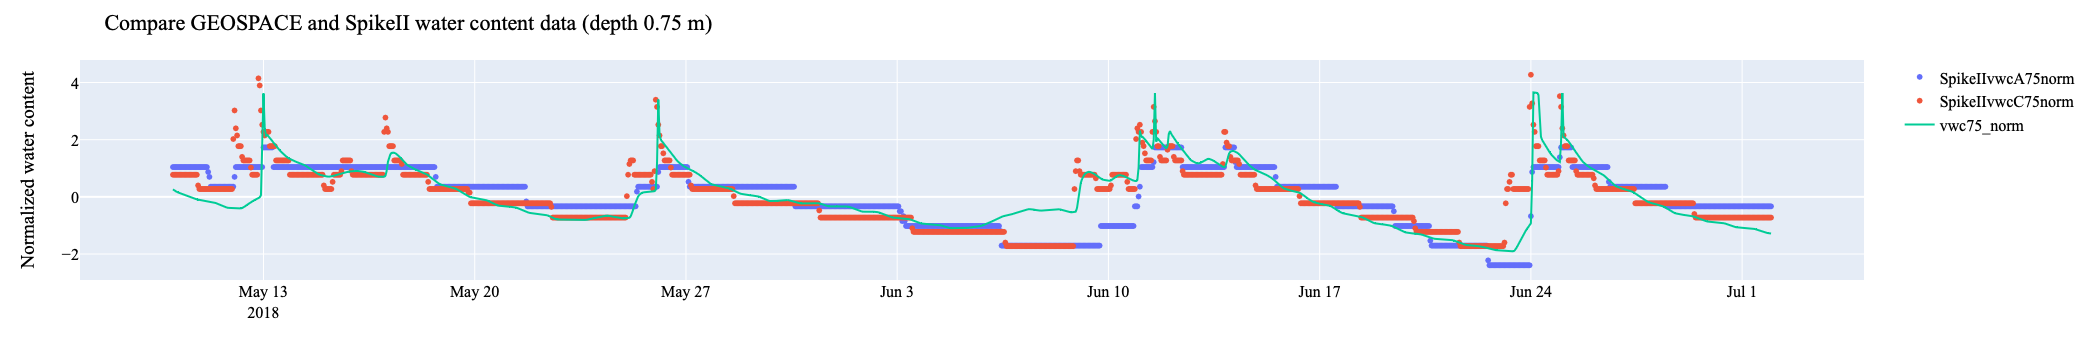

In [92]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA75norm'], mode='markers', name='SpikeIIvwcA75norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC75norm'], mode='markers', name='SpikeIIvwcC75norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75_norm'], mode='lines', name='vwc75_norm'))
fig.update_layout(title= 'vwc75_norm')
fig.update_layout(
        title='Compare GEOSPACE and SpikeII water content data (depth 0.75 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=16))
fig.show()


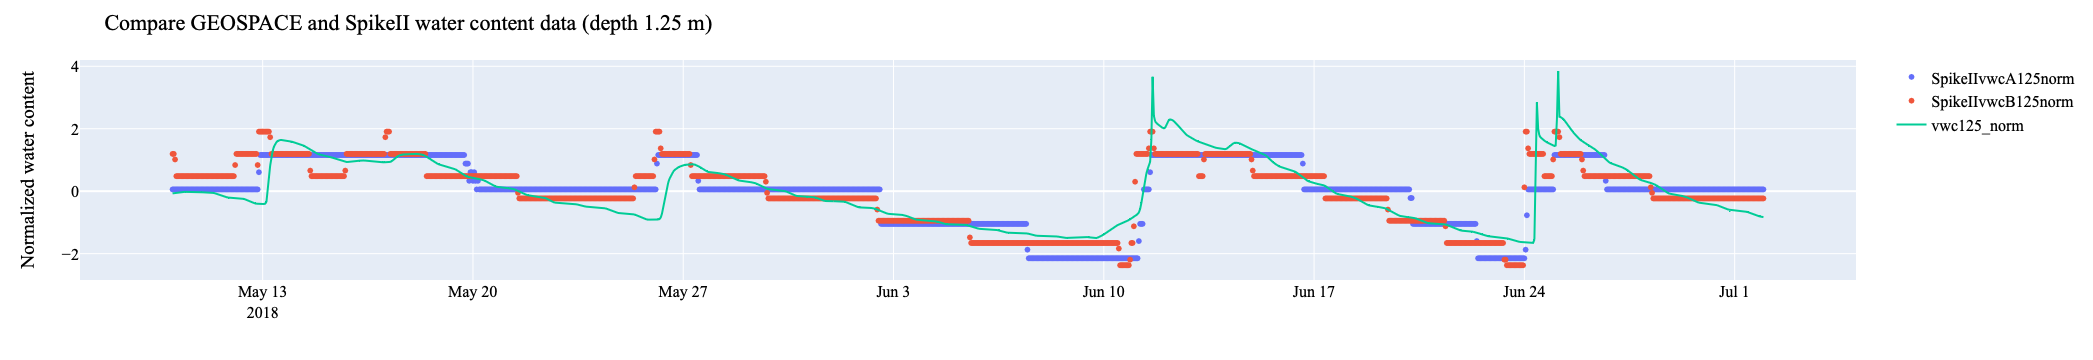

In [93]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA125norm'], mode='markers', name='SpikeIIvwcA125norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB125norm'], mode='markers', name='SpikeIIvwcB125norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125_norm'], mode='lines', name='vwc125_norm'))
fig.update_layout(
        title='Compare GEOSPACE and SpikeII water content data (depth 1.25 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=16))
fig.show()

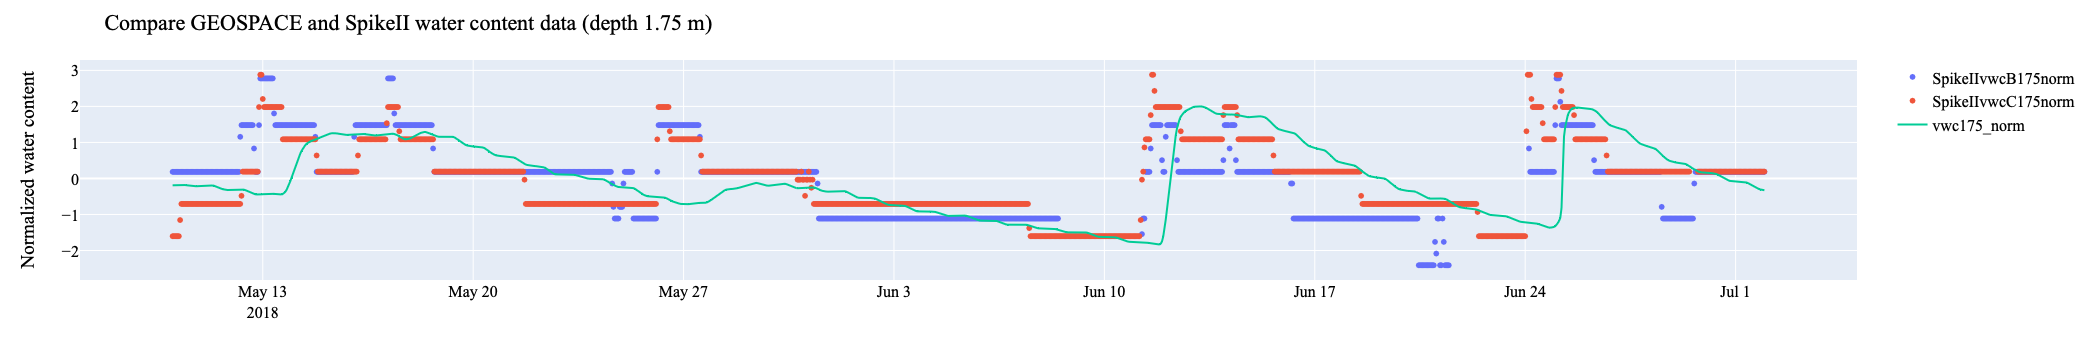

In [94]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB175norm'], mode='markers', name='SpikeIIvwcB175norm'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC175norm'], mode='markers', name='SpikeIIvwcC175norm'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175_norm'], mode='lines', name='vwc175_norm'))
fig.update_layout(
        title='Compare GEOSPACE and SpikeII water content data (depth 1.75 m)',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title=" Normalized water content",
        #legend_title="Date",
        font=dict(size=16))
fig.show()

## Compare absolute water content values

In [95]:
df2 = pd.read_csv('vwcSpikeII_hourly.csv',skiprows=6,parse_dates=[1])
df2 = df2.drop(['Format'],axis=1) 
df2.columns = ['Datetime','vwcA25', 'vwcB25', 'vwcA75', 'vwcC75', 'vwcA125', 'vwcB125', 'vwcB175', 'vwcC175']
#df.set_index('Datetime',inplace=True)
#df2

In [96]:
df = pd.read_csv('vwc_hourly_'+lab+'.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','vwc25mean', 'vwc75mean', 'vwc125mean', 'vwc175mean']
#df2.set_index('Datetime',inplace=True)
#df

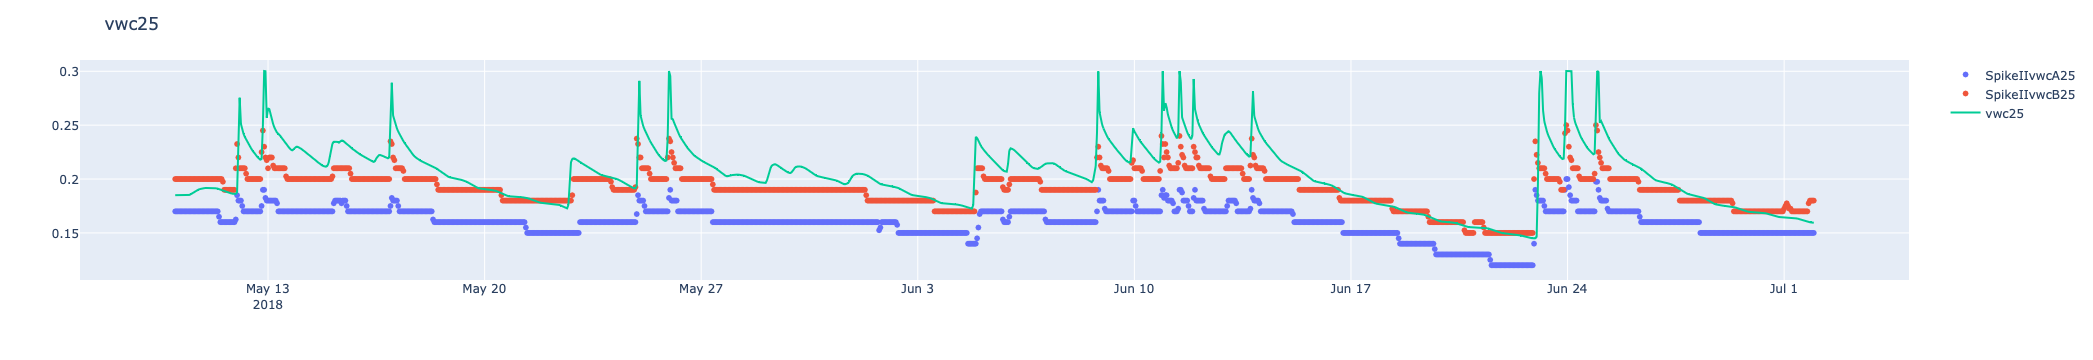

In [97]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA25'], mode='markers', name='SpikeIIvwcA25'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB25'], mode='markers', name='SpikeIIvwcB25'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc25mean'], mode='lines', name='vwc25'))
fig.update_layout(title= 'vwc25')
fig.show()

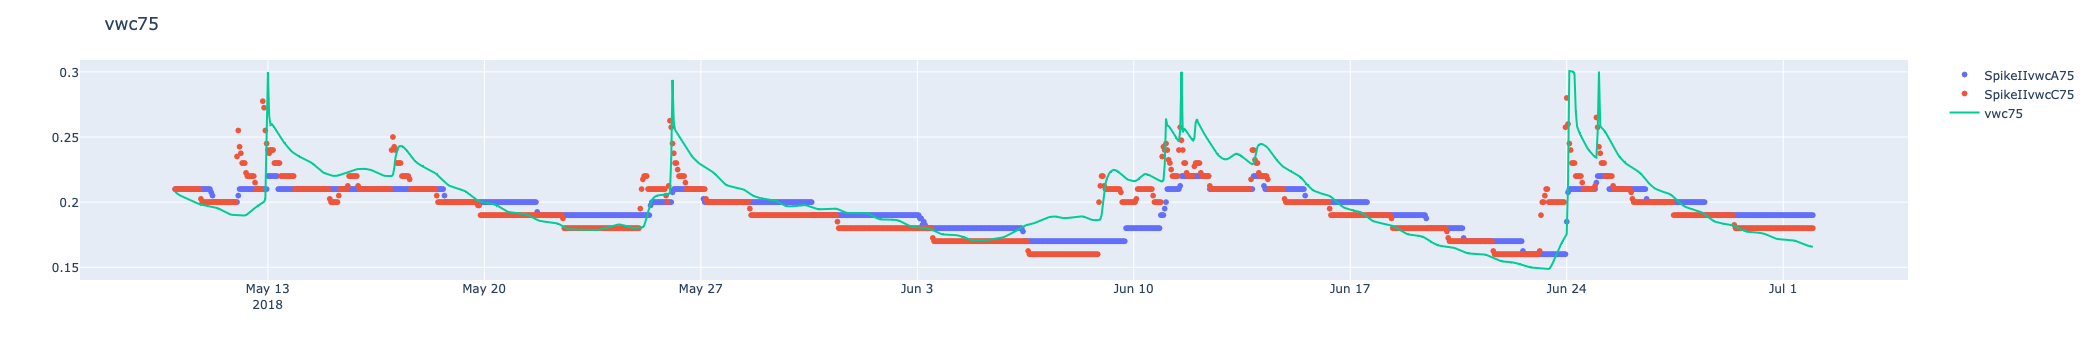

In [98]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA75'], mode='markers', name='SpikeIIvwcA75'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC75'], mode='markers', name='SpikeIIvwcC75'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc75mean'], mode='lines', name='vwc75'))
fig.update_layout(title= 'vwc75')
fig.show()

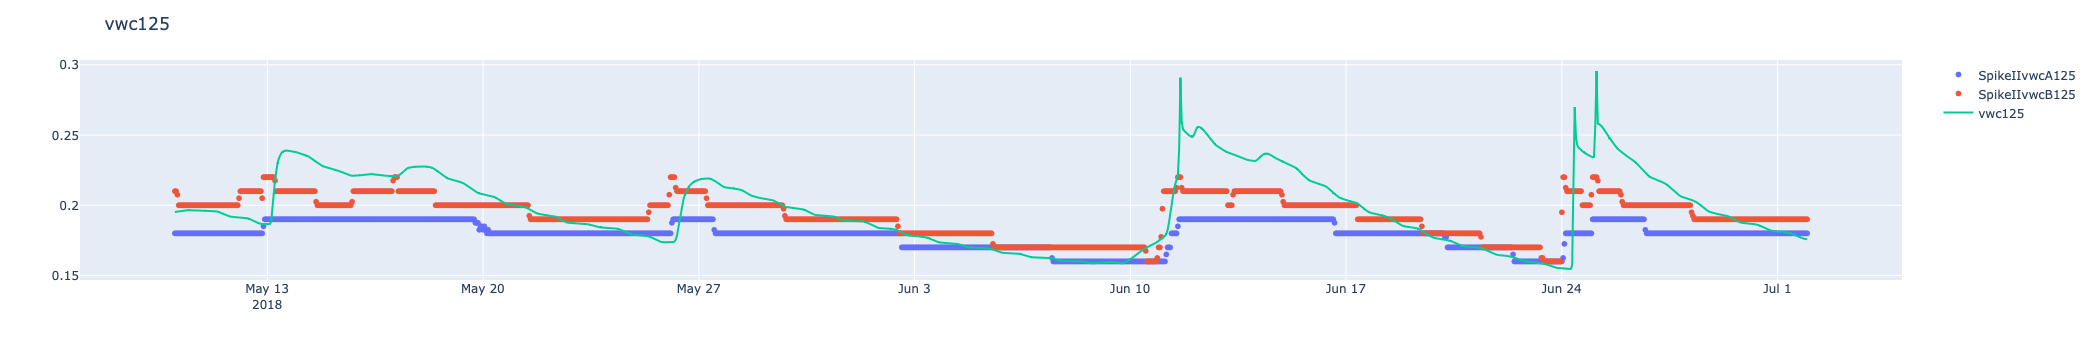

In [99]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA125'], mode='markers', name='SpikeIIvwcA125'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB125'], mode='markers', name='SpikeIIvwcB125'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc125mean'], mode='lines', name='vwc125'))
fig.update_layout(title= 'vwc125')
fig.show()

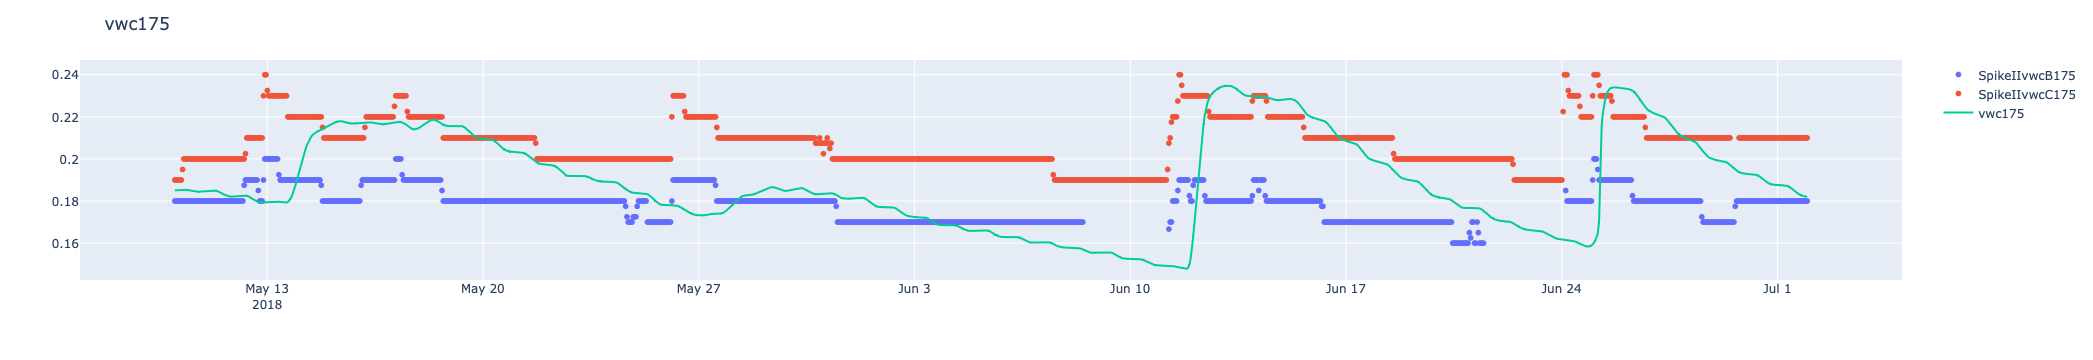

In [100]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB175'], mode='markers', name='SpikeIIvwcB175'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC175'], mode='markers', name='SpikeIIvwcC175'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175mean'], mode='lines', name='vwc175'))
fig.update_layout(title= 'vwc175')
fig.show()

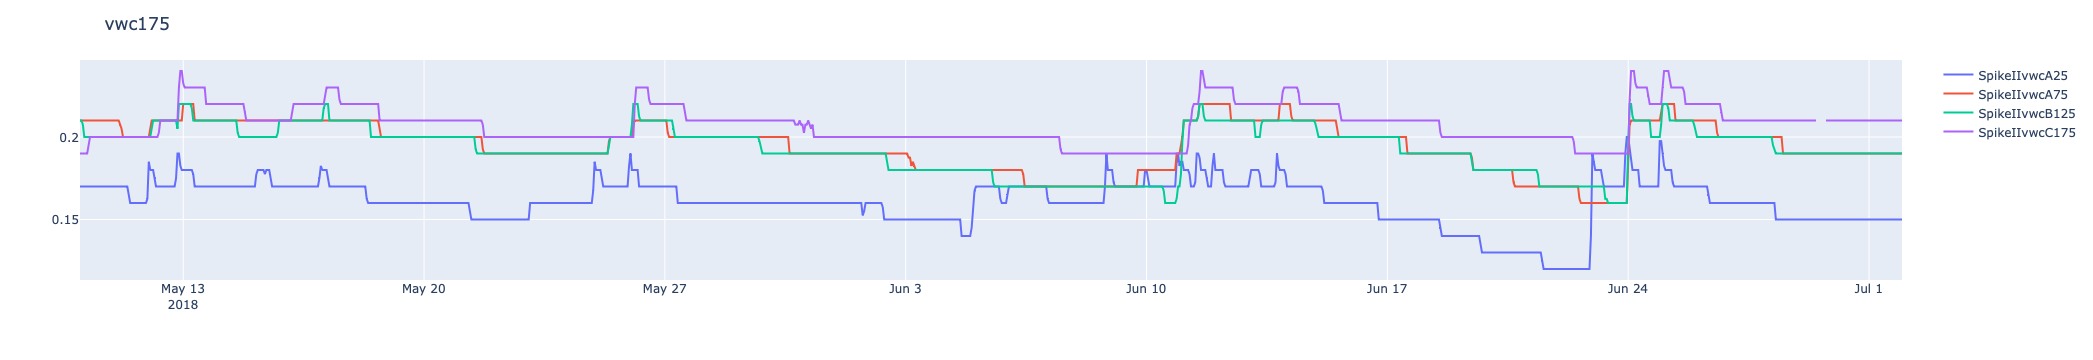

In [101]:
fig = px.line()
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA25'], mode='lines', name='SpikeIIvwcA25'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcA75'], mode='lines', name='SpikeIIvwcA75'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcB125'], mode='lines', name='SpikeIIvwcB125'))
fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['vwcC175'], mode='lines', name='SpikeIIvwcC175'))
#fig.add_trace(go.Scatter(x=df['Datetime'], y=df['vwc175mean'], mode='lines', name='vwc175'))
fig.update_layout(title= 'vwc175')
fig.show()

## Compare leakage

In [102]:
df = pd.read_csv('LeakageSpikeII_h_hourly.csv',skiprows=6,parse_dates=[1])
df = df.drop(['Format'],axis=1) 
df.columns = ['Datetime','Leakage_h']
#df.set_index('Datetime',inplace=True)
#df2

In [103]:
df1 = pd.read_csv('Leakage_mm_h_'+lab+'.csv',skiprows=6,parse_dates=[1])
df1 = df1.drop(['Format'],axis=1) 
df1.columns = ['Datetime','Leakage_mm_h']
#df.set_index('Datetime',inplace=True)
#df2

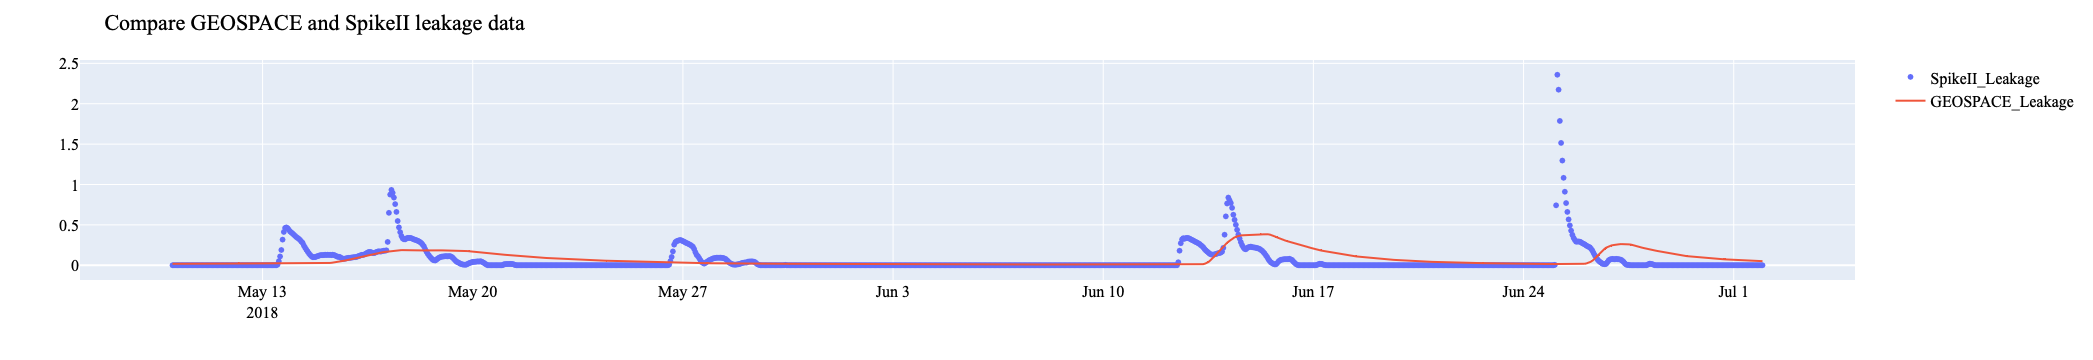

In [104]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['Leakage_h'], mode='markers', name='SpikeII_Leakage'))
fig.add_trace(go.Scatter(x=df1['Datetime'], y=df1['Leakage_mm_h'], mode='lines', name='GEOSPACE_Leakage'))
#fig.add_trace(go.Scatter(x=df2['Datetime'], y=df2['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_02'))
#fig.add_trace(go.Scatter(x=df3['Datetime'], y=df3['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_03'))
#fig.add_trace(go.Scatter(x=df4['Datetime'], y=df4['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_04'))
#fig.add_trace(go.Scatter(x=df5['Datetime'], y=df5['Leakage_mm_h'], mode='lines', name='Leakage_mm_h_05'))
fig.update_layout(
        title='Compare GEOSPACE and SpikeII leakage data',
        #xaxis_title="Date"
        font_family="Times New Roman",
        font_color="Black",
        title_font_family="Times New Roman",
        title_font_color="Black",
        yaxis_title="$Leakage -[mm h^{-1}]$",
        #legend_title="Date",
        font=dict(size=16))
fig.show()

In [105]:
leakageSpikeII= df.Leakage_h[0:1201].sum()
leakageSpikeII

82.87054999999998

In [106]:
leakageGEO= df1.Leakage_mm_h[0:1201].sum()
leakageGEO

89.19320884799072

In [107]:
error=abs(((leakageSpikeII-leakageGEO)/leakageSpikeII)*100)
error

7.629560619533404